This notebook implements gradient descent and stochastic gradient descent algorithm with a linear regression problem

# Importing Libraries

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import seaborn as sns
import random

# Generating data points 

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=20,random_state=42)
x = x[:,0]

Text(0, 0.5, 'Variable Y')

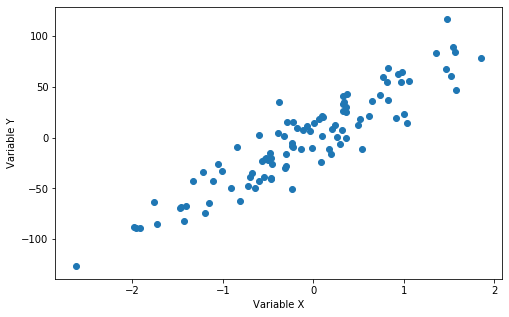

In [3]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1, 1, 1)

ax1.scatter(x,y)
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

#fig.savefig("linear_plot.png")

# Defining gradient descent and stochastic gradient descent function

In [4]:
def define_prediction_function(x,alpha,beta):
    
    return alpha*x + beta

In [5]:
def define_loss_function(x,y,alpha,beta,prediction_function):
    m = len(y)
    
    return (1/2*m)*np.sum((y-prediction_function(x,alpha,beta))**2)

In [6]:
def compute_gradient_descent(alpha,beta,x,y,learning_rate,loss_function):
    
    m = len(y)
    
    alpha_derivative = (1/m)*np.sum(x*((alpha*x+beta)-y))
    beta_derivative = (1/m)*np.sum((alpha*x+beta)-y)
    
    alpha = alpha - alpha_derivative*learning_rate
    beta = beta - beta_derivative*learning_rate
    
    return alpha,beta

In [7]:
def compute_stochastic_gradient_descent(alpha,beta,x,y,learning_rate,loss_function):
    
    
    index,x_value = random.choice(list(enumerate(x)))
    y_value = y[index]
        
    alpha_derivative = x_value*((alpha*x_value+beta)-y_value)
    beta_derivative = (alpha*x_value+beta)-y_value
    
    alpha = alpha - alpha_derivative*learning_rate
    beta = beta - beta_derivative*learning_rate
    

    
    return alpha,beta

In [8]:
prediction_function = define_prediction_function
loss_function = define_loss_function

In [9]:
alpha_grid = beta_grid = np.linspace(-200, 200, 100)
grid_alpha, grid_beta = np.meshgrid(alpha_grid, beta_grid)

# Compute Gradient Descent

In [12]:
alpha = 200
beta = -200
learning_rate = 0.01
epsilon = 0.1
loss_prev = 0

list_point = []
while epsilon >= 0.01:
    alpha,beta = compute_gradient_descent(alpha,beta,x,y,learning_rate,loss_function)
    loss = loss_function(x,y,alpha,beta,prediction_function)
    print(f"Loss : {loss}")
    epsilon = np.abs(loss - loss_prev)
    loss_prev = loss 
    list_point.append((alpha,beta))

    

Loss : 328131264.7923971
Loss : 321374145.45077455
Loss : 314757131.48776895
Loss : 308277313.313093
Loss : 301931841.8318249
Loss : 295717927.18549323
Loss : 289632837.51937604
Loss : 283673897.77546984
Loss : 277838488.5105946
Loss : 272124044.73910624
Loss : 266528054.79971144
Loss : 261048059.24587482
Loss : 255681649.7593334
Loss : 250426468.08623266
Loss : 245280204.99541488
Loss : 240240599.25839835
Loss : 235305436.65059417
Loss : 230472548.97332016
Loss : 225739813.09617683
Loss : 221105150.019362
Loss : 216566523.95550966
Loss : 212121941.43064377
Loss : 207769450.40385202
Loss : 203507139.40528703
Loss : 199333136.6921144
Loss : 195245609.42203355
Loss : 191242762.84400526
Loss : 187322839.50582758
Loss : 183484118.4782087
Loss : 179724914.59499395
Loss : 176043577.70920977
Loss : 172438491.96459535
Loss : 168908075.08229935
Loss : 165450777.66242605
Loss : 162065082.50012124
Loss : 158749503.91589525
Loss : 155502587.09988654
Loss : 152322907.46977526
Loss : 149209070.04206

# Compute Stochastic Gradient Descent 

In [13]:
alpha = 200
beta = -200
learning_rate = 0.01
epsilon = 0.1
loss_prev = 0

list_point_stochastic = []
while epsilon >= 0.01:
    alpha,beta = compute_stochastic_gradient_descent(alpha,beta,x,y,learning_rate,loss_function)
    loss = loss_function(x,y,alpha,beta,prediction_function)
    print(f"Loss : {loss}")
    epsilon = np.abs(loss - loss_prev)
    loss_prev = loss 
    list_point_stochastic.append((alpha,beta))

    

Loss : 318033074.0829767
Loss : 313464496.0150211
Loss : 304228689.69105804
Loss : 296912789.5532549
Loss : 294155188.7061155
Loss : 293630761.74728286
Loss : 291047853.0722036
Loss : 283548186.0769036
Loss : 276485859.09891963
Loss : 272631865.6064822
Loss : 270362614.0984281
Loss : 266747180.41608286
Loss : 264432794.18784088
Loss : 264071533.38731724
Loss : 262071664.53468427
Loss : 260073328.54983324
Loss : 251034032.19642955
Loss : 245512399.89553583
Loss : 244965757.66267005
Loss : 243255568.79803944
Loss : 236320525.34995788
Loss : 226626437.97990713
Loss : 213785285.03788567
Loss : 208821411.541619
Loss : 208744029.03576374
Loss : 192481529.46100926
Loss : 181759576.52133957
Loss : 176597905.07414225
Loss : 172083170.5646344
Loss : 168374597.21688586
Loss : 166065643.1126065
Loss : 161968087.6285977
Loss : 153382306.75184318
Loss : 144869623.0168441
Loss : 129491595.24825777
Loss : 129288763.1153909
Loss : 124034517.40276504
Loss : 117363563.58279623
Loss : 113427954.51530534
L

Loss : 1564605.7263453507
Loss : 1566697.3446033257
Loss : 1574335.801765949
Loss : 1577573.8444558503
Loss : 1577311.685770813
Loss : 1577226.0045867357
Loss : 1579419.7979082407
Loss : 1583034.290453617
Loss : 1583297.1453797026
Loss : 1583685.2501179352
Loss : 1584411.4058091852
Loss : 1587870.579259887
Loss : 1588583.9218537053
Loss : 1589316.9249725468
Loss : 1589255.4415224316
Loss : 1586381.2921032137
Loss : 1586489.0916561312
Loss : 1583890.3530547656
Loss : 1583541.4402520868
Loss : 1584355.6449173463
Loss : 1584500.9421177171
Loss : 1584079.379915191
Loss : 1585855.7873906682
Loss : 1586494.9055043787
Loss : 1586869.7978110202
Loss : 1584717.0620756042
Loss : 1587106.6966638772
Loss : 1584401.9942983978
Loss : 1582999.2108774805
Loss : 1581534.7868604416
Loss : 1582027.3576800707
Loss : 1583997.9579864847
Loss : 1584166.4033286422
Loss : 1587609.1817749601
Loss : 1581691.1503467148
Loss : 1582740.0112477243
Loss : 1583202.7924877405
Loss : 1587154.5172661813
Loss : 1588086.90

Loss : 1568891.0514371016
Loss : 1569661.304872575
Loss : 1570921.7507712764
Loss : 1572250.8134430426
Loss : 1574438.7772173367
Loss : 1580514.5945677022
Loss : 1578481.6488436833
Loss : 1580238.951702542
Loss : 1579573.1208150946
Loss : 1581214.3729688174
Loss : 1581326.1180621688
Loss : 1577701.5012951687
Loss : 1580761.7608340676
Loss : 1578303.9578374296
Loss : 1578493.0140740983
Loss : 1580098.0294212578
Loss : 1576951.7901733397
Loss : 1572569.1163902485
Loss : 1570534.0409630416
Loss : 1569018.0285322291
Loss : 1569154.9293182197
Loss : 1567481.0825399682
Loss : 1568638.3835492001
Loss : 1565158.9131233918
Loss : 1567058.5460270345
Loss : 1564803.6705197017
Loss : 1567065.6179293343
Loss : 1566567.096983755
Loss : 1568197.1970658982
Loss : 1571478.095179318
Loss : 1570293.0634158852
Loss : 1566049.7918270193
Loss : 1569915.9309347798
Loss : 1567212.6093422356
Loss : 1564731.13841034
Loss : 1570822.0644794211
Loss : 1575912.8041922518
Loss : 1572253.1476988976
Loss : 1567770.123

Loss : 1570740.898959211
Loss : 1569839.2478327078
Loss : 1570062.9160217508
Loss : 1567134.7041780683
Loss : 1565700.0601813835
Loss : 1565103.6091354522
Loss : 1565225.3958073352
Loss : 1565987.0125779952
Loss : 1564492.761358019
Loss : 1564462.7448536572
Loss : 1565944.5884530318
Loss : 1567642.4082073022
Loss : 1568833.6492656912
Loss : 1569363.2106138668
Loss : 1570270.5402427982
Loss : 1570436.6739090378
Loss : 1569497.212088758
Loss : 1565537.6083017052
Loss : 1567924.0144983972
Loss : 1569084.713865797
Loss : 1569796.8212963857
Loss : 1568366.1632012376
Loss : 1568860.405819685
Loss : 1566024.7327118407
Loss : 1567138.2342493064
Loss : 1565887.766551816
Loss : 1566307.881382691
Loss : 1567259.3455864016
Loss : 1565643.694385041
Loss : 1565121.823325264
Loss : 1564013.1308139071
Loss : 1564060.5774489776
Loss : 1565145.329733692
Loss : 1565428.3326562056
Loss : 1564097.7910997581
Loss : 1563344.2400677777
Loss : 1563757.1122434805
Loss : 1563107.7952431897
Loss : 1564178.8243446

# Visualizing Mean squared error

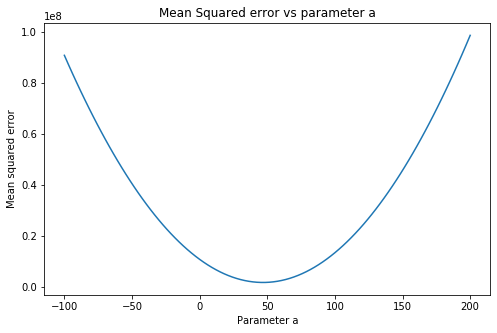

In [14]:
alpha_list = np.linspace(-100,200,100)

loss_2d = []
for alpha_param in alpha_list:
    loss_2d.append(loss_function(x,y,alpha_param,0,prediction_function))

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(alpha_list,loss_2d)
plt.title("Mean Squared error vs parameter a")
plt.xlabel("Parameter a")
plt.ylabel("Mean squared error")
fig.savefig("mse.png")


# Visualizing linear regression

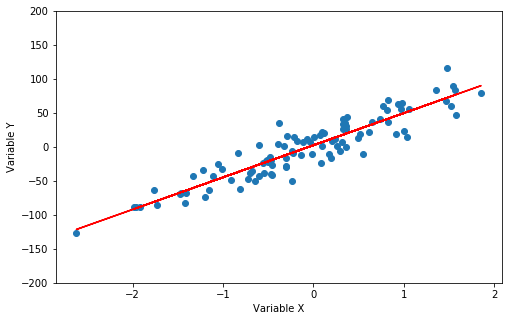

In [15]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_ylim([-200,200])
ax1.scatter(x,y)
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

#fig.savefig("linear_plot.png")
plt.plot(x,prediction_function(x,alpha,beta),color="r")

# Stochastic Gradient Descent 3D animation

In [16]:
list_test = list_point[::10]
list_test_stochastic = list_point_stochastic[::10]

In [17]:
grid_z = []

for beta in beta_grid:
    row_list = []
    for alpha in alpha_grid:
        row_list.append(loss_function(x,y,alpha,beta,prediction_function))
    grid_z.append(row_list)

In [18]:
x_data = []
y_data = []
z_data = []
z_data_2d = []
for alpha,beta in list_test:
    x_data.append(alpha)
    y_data.append(beta)
    z_data.append(loss_function(x,y,alpha,beta,prediction_function))
    z_data_2d.append(loss_function(x,y,alpha,0,prediction_function))
    

x_data_stochastic = []
y_data_stochastic = []
z_data_stochastic = []

for alpha,beta in list_test_stochastic:
    x_data_stochastic.append(alpha)
    y_data_stochastic.append(beta)
    z_data_stochastic.append(loss_function(x,y,alpha,beta,prediction_function))
    

In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


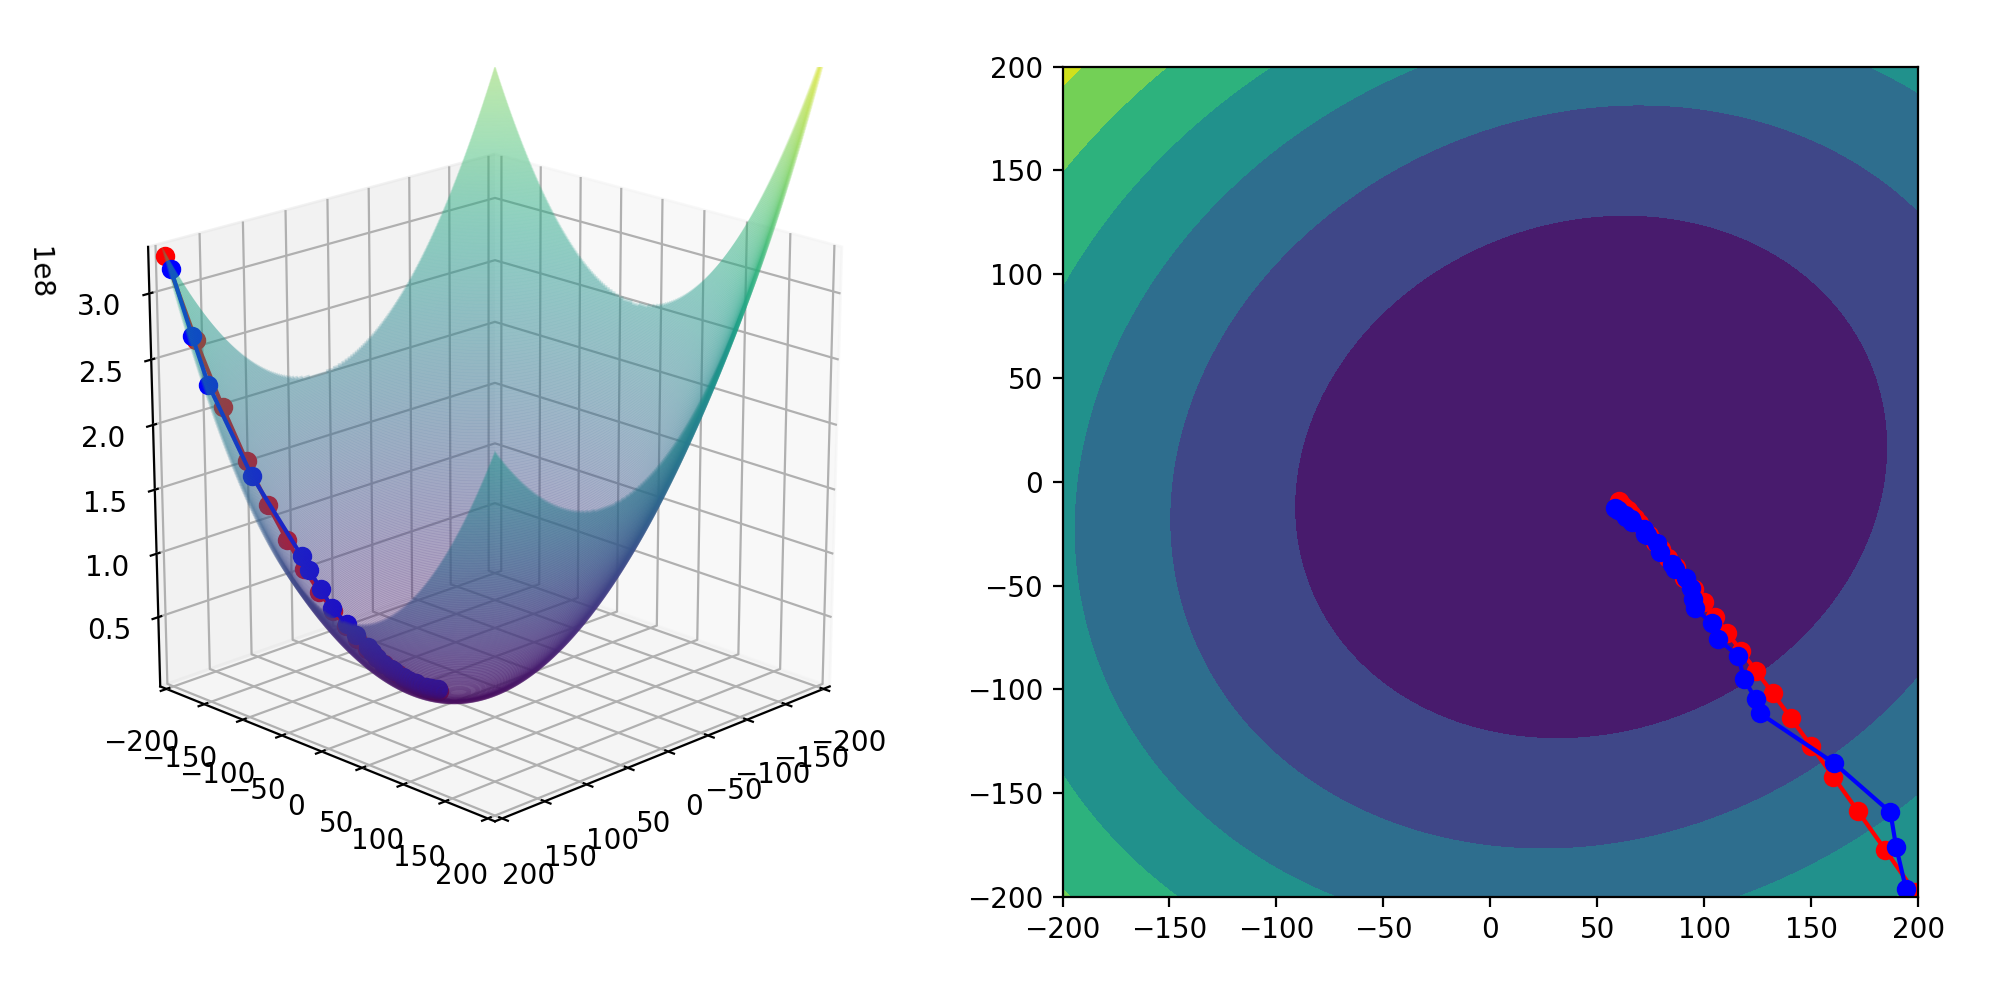

/Users/baptiste/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'color'
  import sys


In [22]:
data = np.array([[x_data,y_data,z_data]])
data_stochastic = np.array([[x_data_stochastic,y_data_stochastic,z_data_stochastic]])

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.contour3D(grid_alpha, grid_beta, grid_z, 500, color="red",alpha=0.2)
ax1.view_init(elev=20., azim=45)
lines = [ax1.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1],color="red")[0] for dat in data]
lines_stochastic = [ax1.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1],color="blue")[0] for dat in data_stochastic]

ax1.set_xlim([-200,200])
ax1.set_ylim([-200,200])
ax1.set_zlim([min(z_data),max(z_data)])

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim([-200,200])
ax2.set_ylim([-200,200])

cp = ax2.contourf(alpha_grid,beta_grid,grid_z, cmap='viridis')
line2, = ax2.plot([],[],color='red',marker="o")
line3, = ax2.plot([],[],color='blue',marker="o")


def update_lines(num, dataLines, data_stochastic, lines,lines_stochastic,line2,line3):
    
    line2.set_data(x_data[0:num], y_data[0:num])
    line3.set_data(x_data_stochastic[0:num], y_data_stochastic[0:num])
    
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...

        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        line.set_marker("o")
        
    for line, data in zip(lines_stochastic, data_stochastic):
        # NOTE: there is no .set_data() for 3 dim data...

        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        line.set_marker("o")
    
    
        
    return lines,lines_stochastic,line2,line3


line_ani = animation.FuncAnimation(fig, update_lines, fargs=(data,data_stochastic,lines,lines_stochastic,line2,line3),
                                   frames=30, blit=False)


fig.tight_layout(pad=2.0)

#line_ani.save('stochastic_gradient_descent.gif', writer="PillowWriter")
#fig.savefig('last_frame.png', writer="PillowWriter")

# Gradient Descent 2D animation

<IPython.core.display.Javascript object>


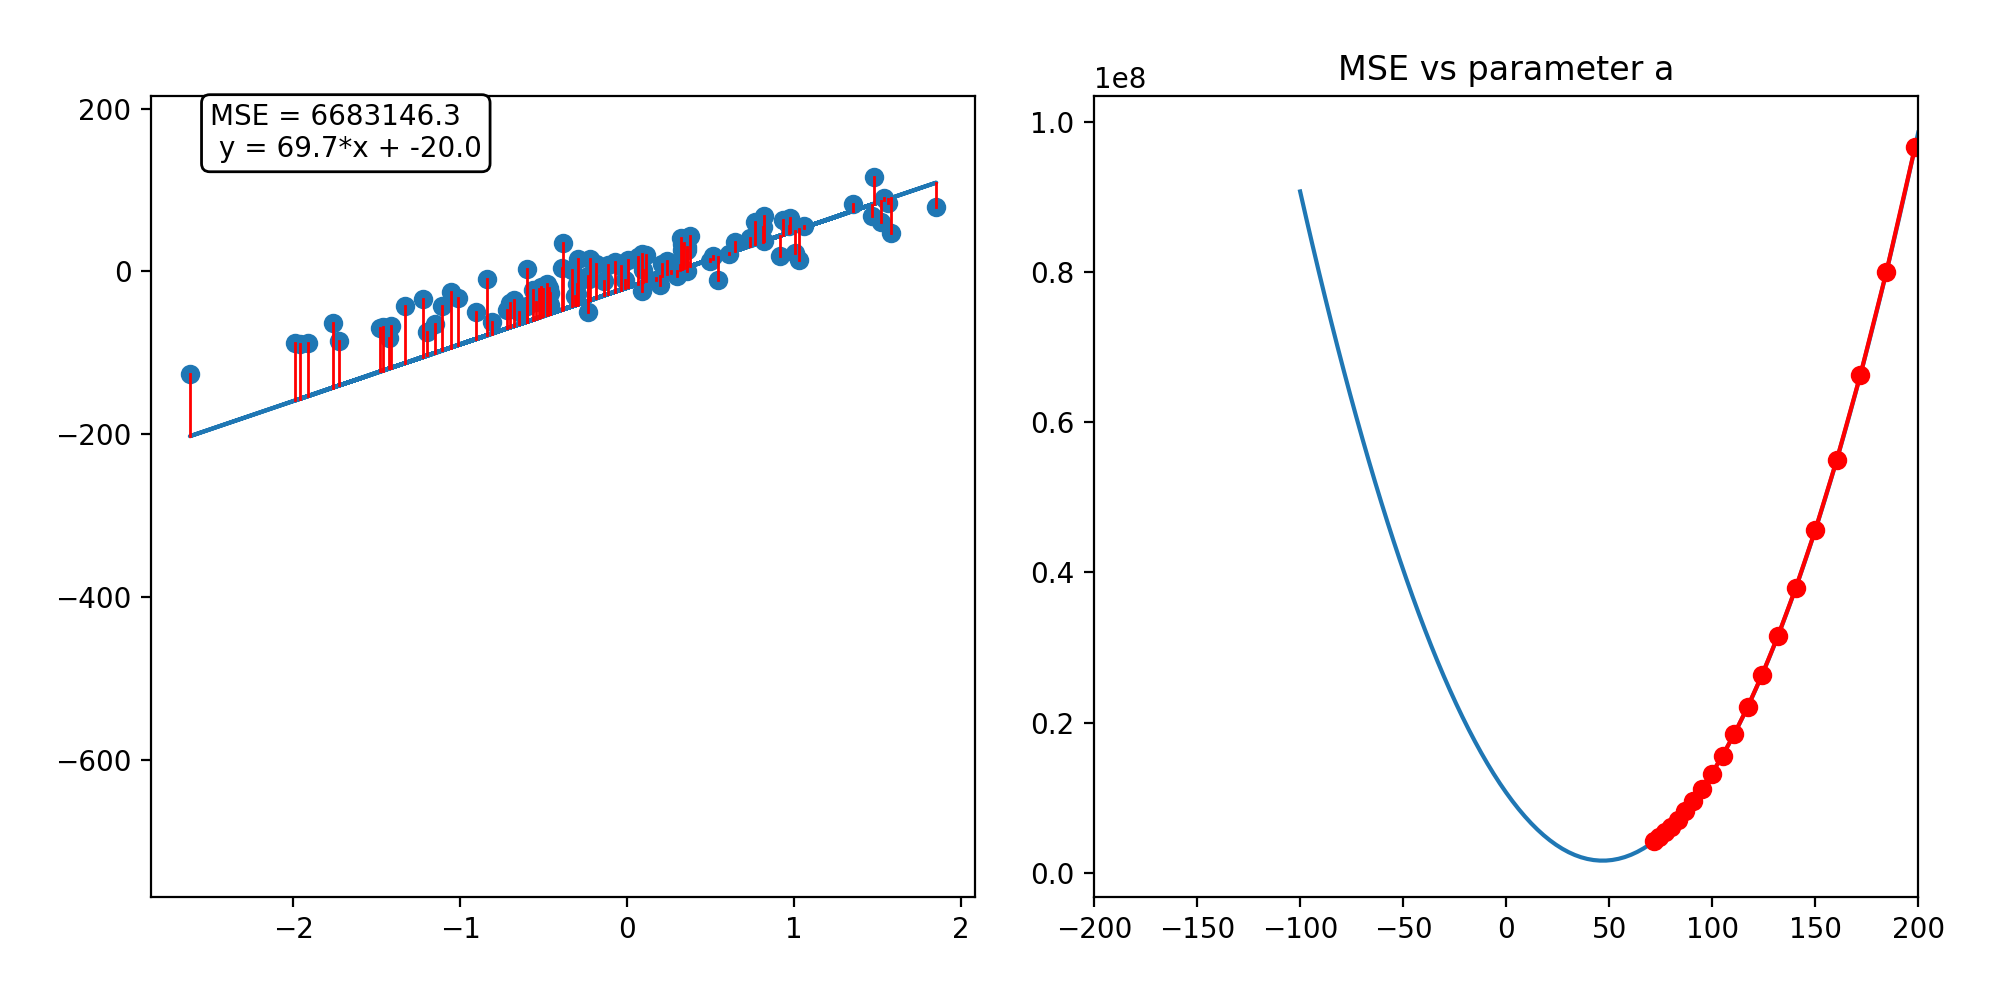

In [23]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)

scatter = ax1.scatter(x,y)
decision_function, = ax1.plot(x,prediction_function(x,200,-200))
lines = [ax1.plot([x[i],x[i]],[prediction_function(x[i],200,-200),y[i]],color="r",linewidth=1) for i in range(0,len(x))]

title = ax1.text(-2.5,140,f'MSE = {z_data[0]:.1f}  \n y = {x_data[0]:.1f}*x + {y_data[0]:.1f}',bbox=dict(boxstyle='round', fc='w'))


ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim([-200,200])
ax2.set_title("MSE vs parameter a")
ax2.plot(alpha_list,loss_2d)
line2, = ax2.plot([],[],color='r',marker="o")


def update_graph(num):
    
    line2.set_data(x_data[0:num],z_data_2d[0:num])
    decision_function.set_data(x,prediction_function(x,x_data[num],y_data[num]))
    
    title.set_text(f'MSE = {z_data[num]:.1f}  \n y = {x_data[num]:.1f}*x + {y_data[num]:.1f}')

    
    for i in range(0,len(x)):
        lines[i][0].set_data([x[i],x[i]],[prediction_function(x[i],x_data[num],y_data[num]),y[i]])
    
    return decision_function,title,lines,line2


line_ani = animation.FuncAnimation(fig, update_graph,
                                   frames=30, blit=False)


fig.tight_layout(pad=2.0)

#line_ani.save('gradient_descent_parameter_a.gif', writer="PillowWriter")
#fig.savefig('last_frame.png', writer="PillowWriter")

<IPython.core.display.Javascript object>


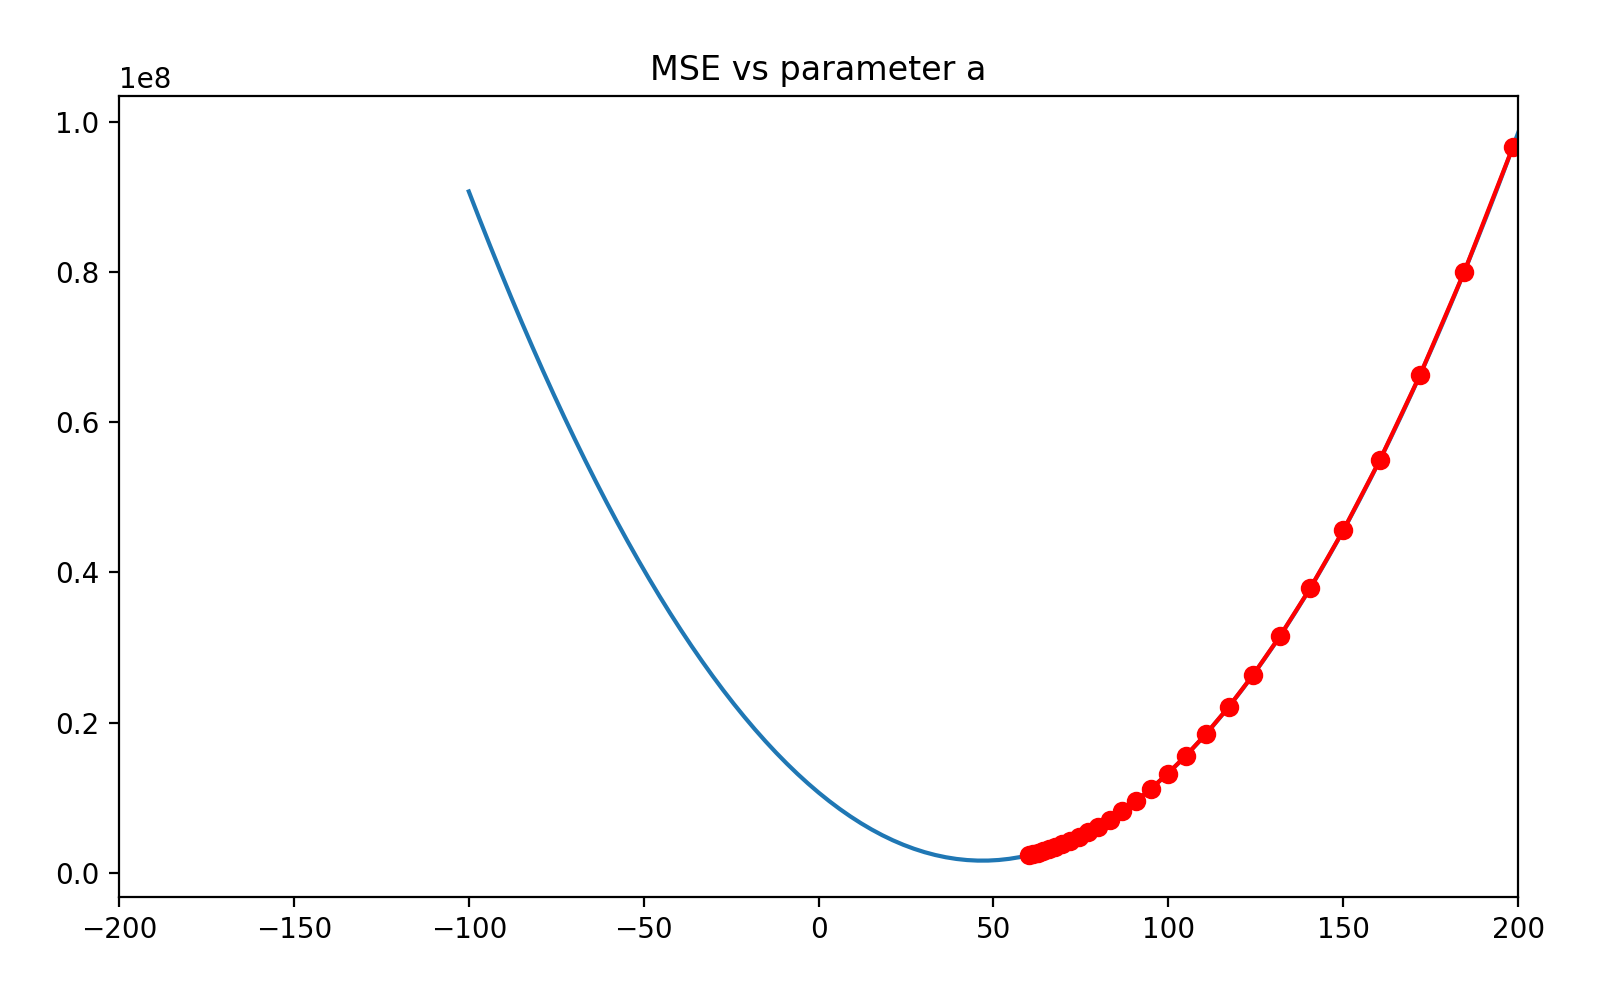

In [24]:
fig = plt.figure(figsize=(8,5))

ax2 = fig.add_subplot(1, 1, 1)
ax2.set_xlim([-200,200])
ax2.set_title("MSE vs parameter a")
ax2.plot(alpha_list,loss_2d)
line2, = ax2.plot([],[],color='r',marker="o")

def update_graph(num):
    
    line2.set_data(x_data[0:num],z_data_2d[0:num])

    return line2


line_ani = animation.FuncAnimation(fig, update_graph,
                                   frames=30, blit=False)


fig.tight_layout(pad=2.0)

#line_ani.save('gradient_descent_parameter_a.gif', writer="PillowWriter")
#fig.savefig('gradient_descent_parameter_a.png', writer="PillowWriter")